# LIBRARY & PACKAGE IMPORT

In [1]:
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
from pandas.util.testing import assert_frame_equal

pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import cufflinks as cf
cf.go_offline(connected=True)

    ### Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
        ### More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
        ### More Visualizations
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize

import statsmodels.tsa.api as smt
import statsmodels.api as sm

from itertools import product

import yfinance as yf
from yahoofinancials import YahooFinancials
import requests

import locale
from datetime import date, datetime, timedelta
from urllib.request import urlopen
import os
import time
import csv
import json

import warnings
warnings.filterwarnings('ignore')

print('done')

done


In [2]:
start = datetime(2019, 1, 1)
end = datetime.now()

ticker = 'BE'
# ticker = input('Ticker: ')

Moving Average vs Close: 21/63/126 vs close


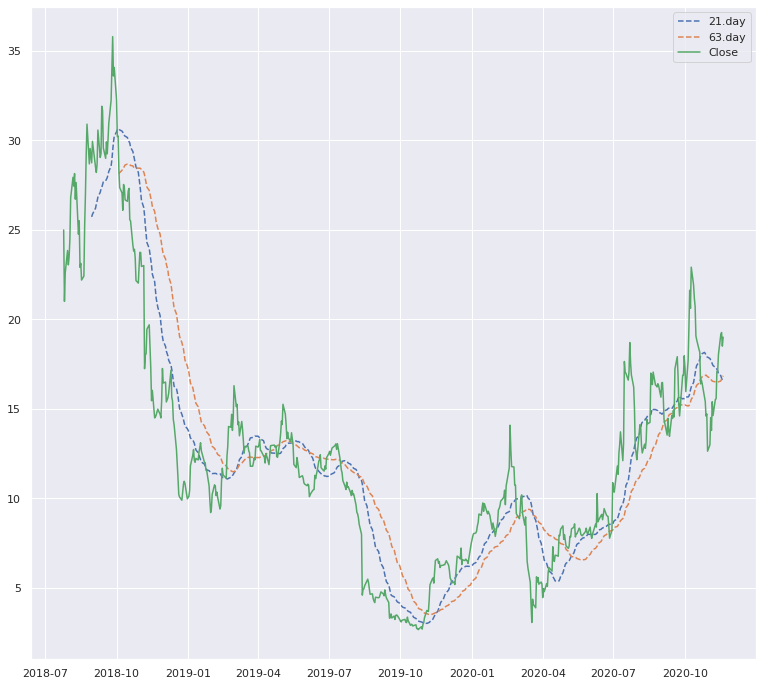

The RMSE_W Is: 269.997%
The RMS_M Is: 562.895%
Moving Average vs Close: 13, 50


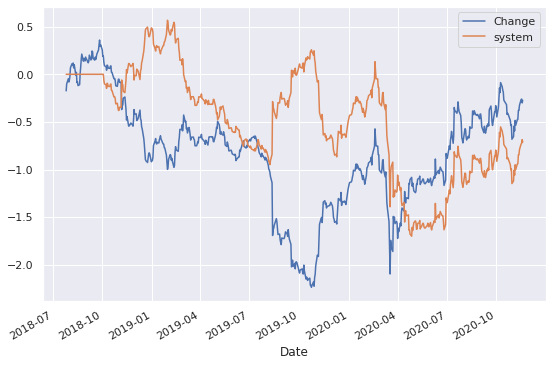

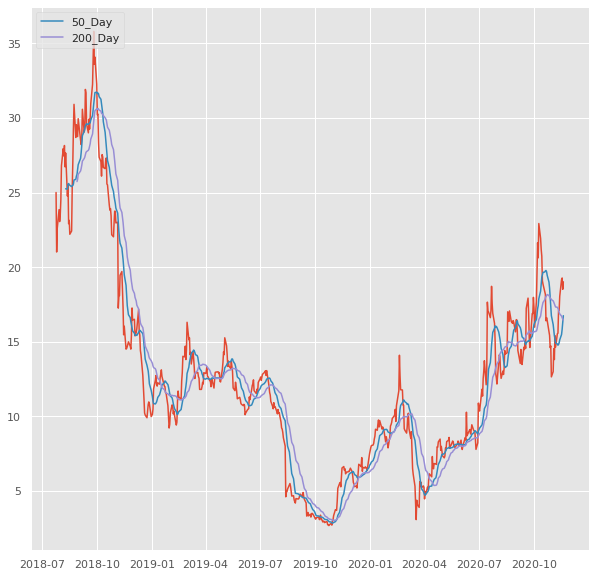

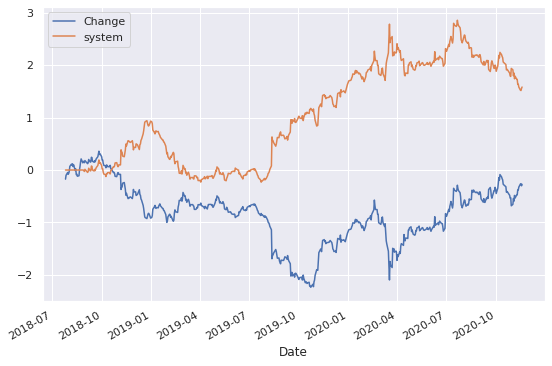

In [6]:
######################################## LIB IMPORT
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

################################################## FUNCTIONS
def display_as_percentage(val):
    return '{:.3f}%'.format(val * 100)

# ticker = input('Ticker: ')

mAvg1_short = int(input('Moving Average 1-short: '))
mAvg1_long = int(input('Moving Average 1-long: '))
mAvg2_short = int(input('Moving Average 2-short: '))
mAvg2_long = int(input('Moving Average 2-long: '))

stock1 = wb.get_data_yahoo(ticker, start = start, end = end)
stock = stock1.drop(
    ['Adj Close','Volume','Open','Low','High'], axis=1
    )
######################################## moving average
stock['21.day'] = stock['Close'].rolling(mAvg1_short).mean().shift()
stock['MAD.10'] = np.abs(stock['Close']-stock['21.day'])

stock['63.day'] = stock['Close'].rolling(mAvg1_long).mean().shift()
stock['MAD.30'] = np.abs(stock['Close']-stock['63.day'])

# stock['126.day'] = stock['Close'].rolling(126).mean().shift()
# stock['MAD.90'] = np.abs(stock['Close']-stock['126.day'])
    ################## PLOT 5/21/63/126/252
print('Moving Average vs Close: 21/63/126 vs close')
plt.figure(figsize=(13,12))
plt.plot(stock['21.day'],'--', label='21.day')
plt.plot(stock['63.day'],'--', label='63.day')
# plt.plot(stock['126.day'],'--', label='126.day')
plt.plot(stock['Close'], label='Close')
plt.legend()
plt.show();

stock['Change'] = np.log(stock.Close/stock.Close.shift())

stock['position'] = np.where(stock['21.day'] > stock['63.day'], 1, 0)
stock['position'] = np.where(stock['21.day'] < stock['63.day']
    , -1, stock['position'])

stock['system'] = stock['position'] * stock['Change']
stock[['Change','system']].cumsum().plot(figsize = (9, 6));

################################# PULL HISTORICAL DATA DAILY

# stock = pdr.get_data_yahoo(ticker, start=start, end=end)
stock2 = stock1.drop(['Adj Close','Volume'], axis=1)

    # RESAMPLE IN WEEKLY DATA
stock_W = pd.DataFrame(stock1.resample('W').last())

    # RESAMPLE IN MONTHLY DATA
stock_M = pd.DataFrame(stock1.resample('M').last())

    # MODEL WEEKLY DATASET
model = ses(stock_W['Close'])
model_fit_W=model.fit()
model_fit_W.predict()

        # WEEKLY
y_hat_W=model_fit_W.fittedvalues

    # MODEL MONTHLY DATASET
model = ses(stock_M['Close'])
model_fit_M=model.fit()
model_fit_M.predict()
        # MONTHLY

y_hat_M=model_fit_M.fittedvalues

################################## MEAN ABSOLUTE DEVIATION
stock_W['W'] = stock_W['Close'].rolling(5).mean().shift()
stock_W['MAD_W'] = np.abs(stock_W['Close']-stock_W['W'])

stock_M['M']=stock_M['Close'].rolling(5).mean().shift()
stock_M['MAD_M']=np.abs(stock_M['Close']-stock_M['M'])

    ##################################
    # MEAN PERCENT ERROR
stock_W['MAPE_W']=stock_W['MAD_W']/stock_W['Close']
stock_M['MAPE_M']=stock_M['MAD_M']/stock_M['Close']

    # MEAN SQUARED ERROR
stock_W['MSE_W']=stock_W['MAD_W']**2
MSE_W = stock_W['MSE_W'].mean()

    # MEAN 
stock_M['MSE_M']=stock_M['MAD_M']**2
MSE_M = stock_M['MSE_M'].mean()

    ############################
    # WEEKLY
RMSE_W = np.sqrt(MSE_W)
model_fit_W.params
print('The RMSE_W Is: '+display_as_percentage(RMSE_W))

    # MONTHLY
RMS_M = np.sqrt(MSE_M)
model_fit_M.params
print('The RMS_M Is: '+display_as_percentage(RMS_M))

    ############################
alpha = 0.1
alpha_M = 0.1
values = pd.DataFrame({'alpha': np.zeros(10), 
                      'MSE_W': np.zeros(10)})
values_M= pd.DataFrame({'alpha': np.zeros(10), 
                        'MSE_M': np.zeros(10)})

#################################### MOVING AVG 5/50/200

for i in range(10):
    model=ses(stock_W['Close'])
    stock_W['Forecast']=model.fit(alpha).fittedvalues
    stock_W['MSE_W'].mean()
    values['alpha'][i]=alpha
    values['MSE_W'][i]=MSE_W
    alpha+=0.1
    
for i in range(10):
    model_M=ses(stock_M['Close'])
    stock_M['Forecast']=model.fit(alpha).fittedvalues
    stock_M['MSE_M'].mean()
    values_M['alpha'][i]=alpha_M
    values_M['MSE_M'][i]=MSE_M
    alpha_M+=0.1
    
    
# df = pdr.get_data_yahoo(ticker,start = start, end=end)
df = stock1.drop(
    ['Adj Close','Volume','High', 'Low','Open'], axis=1)

df['50day']=df['Close'].rolling(mAvg2_short).mean()
df['200day']=df['Close'].rolling(mAvg2_long).mean()
df['Change']=np.log(df.Close/df.Close.shift())

print('Moving Average vs Close: ' + str(mAvg2_short) + ', ' + str(mAvg1_long))
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(df.Close)
    plt.plot(df['50day'], label='50_Day')
    plt.plot(df['200day'], label='200_Day')
    plt.legend(loc=2)
    # plt.show();

df['position']=np.where(df['50day']>df['200day'],1,0)
df['position']=np.where(df['50day']<df['200day'],-1, df['position'])


df['system'] = df['position'] * df['Change']
df[['Change','system']].cumsum().plot(figsize = (9, 6));

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.8447348437800337
p-value : 0.3584889633978512
#Lags Used : 1
Number of Observations Used : 585
weak evidence against null hypothesis,         time series has a unit root, indicating it is non-stationary 
Augmented Dickey-Fuller Test:
ADF Test Statistic : -25.38495585337926
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 585
strong evidence against the null hypothesis,               reject the null hypothesis. Data has no unit root and               is stationary

                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                  587
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -900.641
Date:                            Thu, 19 Nov 2020   AIC                           1803.281
Time:                                    11:27:02   BIC                           1807.634
Sample:     

Text(0.5, 0, 'Date')

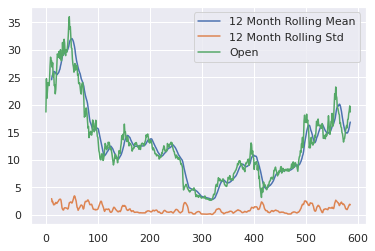

<Figure size 432x288 with 0 Axes>

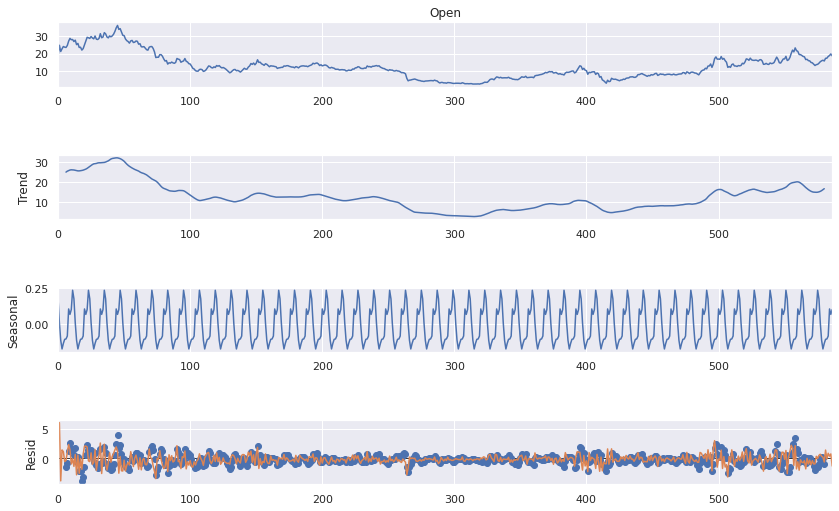

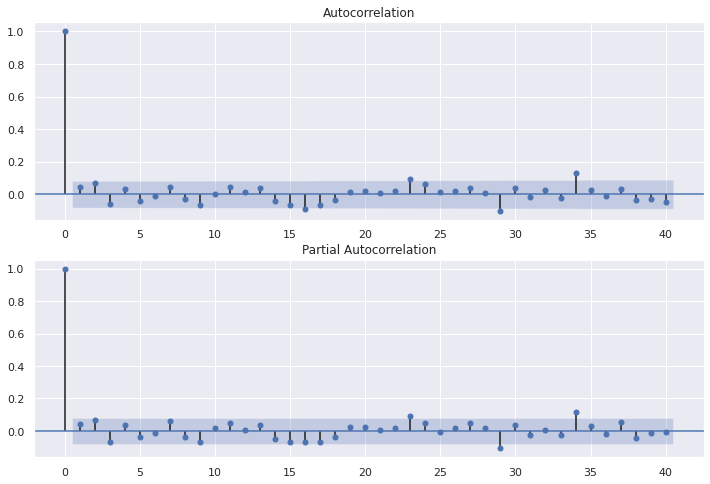

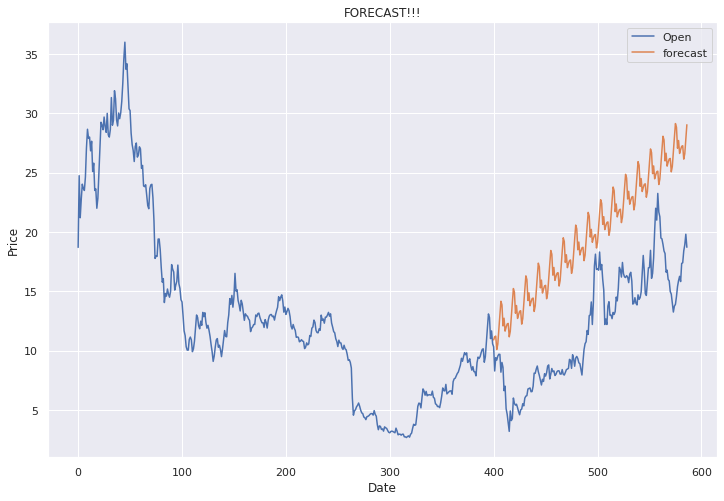

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df1 = wb.get_data_yahoo(ticker, start = start, end=end)
df1.to_csv('data/_105.csv')
df = pd.read_csv('data/_105.csv')

##############################################
#df = stock.drop(['Adj Close','Volume','Open','Low','High'], axis=1)
df['Date1']=df['Date']
df.set_index('Date1')
timeseries = df['Open']

##############################################
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

##############################################
decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(13, 8)

##############################################
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used',
              'Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, \
              reject the null hypothesis. Data has no unit root and \
              is stationary")
    else:
        print("weak evidence against null hypothesis, \
        time series has a unit root, indicating it is non-stationary ")
        
adf_check(df['Open'])
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)
adf_check(df['Open First Difference'].dropna())
df['Open First Difference'].plot()
print('')

##############################################
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], 
                               lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:],
                                lags=40, ax=ax2)

##############################################
model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0),
                                  seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())

##############################################
df['forecast'] = results.predict(start = 400, end= 700, dynamic= True) 
df[['Open','forecast']].plot(figsize=(12,8))
plt.title('FORECAST!!!')
plt.ylabel('Price')
plt.xlabel('Date')